<a href="https://colab.research.google.com/github/thanaphornkanking/BSC_DPDM23/blob/main/Internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Dict

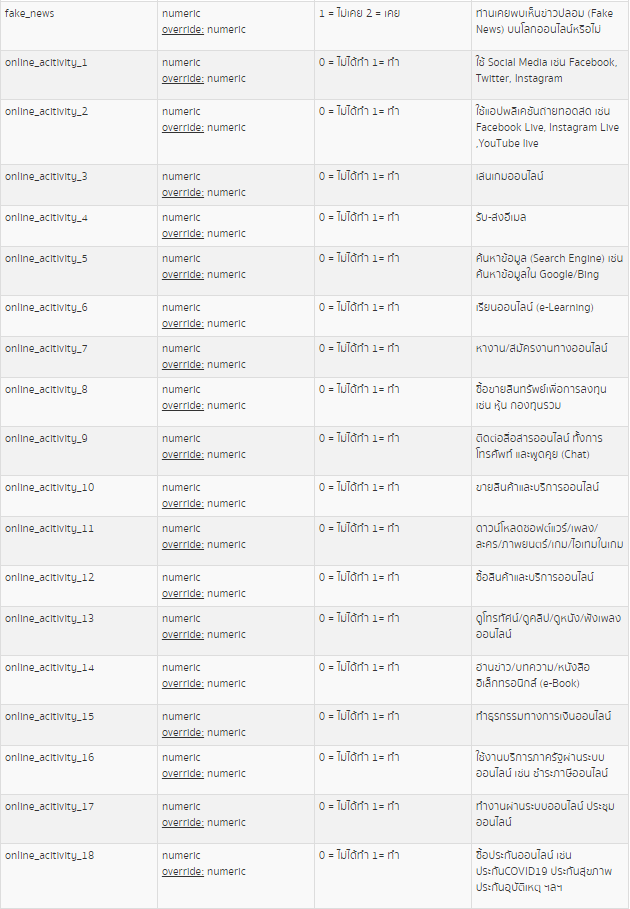

#Read Data

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df


,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
count_fake_news_encounters = df[df['fake_news'] == 1].shape[0]
count_fake_news_encounters

1151

# ตรวจสอบค่า Null หรือค่าผิดปกติ ใน DataFrame

- ตรวจสอบค่าใน column fake_news ว่าเป็นค่า 1 และ  2 หรือไม่

In [ ]:
# Check fake_news column
valid_fake_news = all(df['fake_news'].isin([1, 2]))
valid_fake_news

True

- ตรวจสอบค่าใน column online_acitivity ทั้งหมด ว่าเป็นค่า 0 และ  1 หรือไม่

In [ ]:
# เลือกคอลัมน์ที่ 2 ถึงคอลัมน์สุดท้าย
activity_columns = df.iloc[:, 1:]

# ตรวจสอบว่าค่าทั้งหมดเป็น 0 หรือ 1
valid_values = (activity_columns.isin([0, 1])).all().all()

valid_values


False

- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [ ]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- แสดง row ที่มีข้อมูลที่ไม่ใช่ตัวเลข

In [ ]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
non_numeric_rows_df = df[non_numeric_rows]
non_numeric_rows_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
56,2,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,S


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [ ]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [ ]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [ ]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


# การแบ่งชุดข้อมูล

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
data = numeric_df.copy()
data

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


In [ ]:
# แบ่งข้อมูลออกเป็นชุดในการ train และtest (train 80% test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of the training and test sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Test set shape (X):", X_test.shape)
print("Test set shape (y):", y_test.shape)

Training set shape (X): (17318, 18)
Training set shape (y): (17318,)
Test set shape (X): (4330, 18)
Test set shape (y): (4330,)


# Method 1: Threshold Adjustment

In [ ]:
# Assuming you have a trained model named 'model'

# Get predicted probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Set a new threshold for classification
new_threshold = 0.4  # Adjust this value as needed

# Update predictions based on the new threshold
y_pred_new_threshold = (y_pred_prob[:, 1] >= new_threshold).astype(int)


NameError: name 'model' is not defined

# Method 2: Oversampling/Undersampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


# Method 3: Cost-sensitive Learning

In [ ]:
# Assuming you have a trained model named 'model'

# Define class weights (higher weight for minority class)
class_weights = {1: 10, 2: 1}  # Adjust weights as needed

# Fit the model with class weights
model.fit(X_train, y_train, class_weight=class_weights)


# Dicition tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
decision_tree.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print other classification metrics
print(classification_report(y_test, y_pred))
